In [1]:
import functools
import random
from enum import IntEnum
from typing import Iterable

random.seed(0)

class CellState(IntEnum):
    DEAD = 0
    LIVE = 1
    
    def __add__(self, other: int) -> int:
        return self.value + other
    
    def __str__(self) -> str:
        return str(self.value)

In [2]:
class GameOfLife:
    def __init__(self, length: int, height: int) -> None:
        if (length <= 0):
            raise ValueError("Grid length must be > 0")
        elif (height <= 0):
            raise ValueError("Grid height must be > 0")
        
        self.length: int = length
        self.height: int = height
        
        # initialize a blank grid of all dead cells
        self.grid: list[list[CellState]] = [[CellState.DEAD for __ in range(self.length)] for _ in range(self.height)]
    
    def initialize_grid(self, live_threshold: float) -> None:
        if (live_threshold <= 0 or live_threshold >= 1):
            raise ValueError("Live threshold must be between (0, 1)")
        
        # randomly initialize the grid state
        for y in range(self.height):
            for x in range(self.length):
                self.grid[y][x] = CellState.DEAD if random.random() < live_threshold else CellState.LIVE
    
    def print_grid(self) -> None:
        for row in self.grid:
            print(" ".join([str(col) for col in row]))
    
    def next(self) -> None:
        # initialize a blank grid of all dead cells
        next_grid = [[CellState.DEAD for __ in range(self.length)] for _ in range(self.height)]
        
        for y in range(self.height):
            for x in range(self.length):
                next_grid[y][x] = self.__apply_rules(cell_state=self.grid[y][x],
                                                     live_neighbors=self.__count_live_neighbors(y, x))
        
        self.grid = next_grid
    
    def __count_live_neighbors(self, y: int, x: int) -> int:
        return functools.reduce(lambda acc, val: acc + val, self.__get_neighbor_states(y, x), 0)
    
    def __get_neighbor_states(self, y: int, x: int) -> Iterable[CellState]:
        '''
        The four edges of the grid are stitched together like a toroidal array.
        '''
        for row_shift in [-1, 0, 1]:
            x_neighbor: int = x + row_shift
            if x_neighbor == self.length:
                x_neighbor = 0
                
            for col_shift in [-1, 0, 1]:
                y_neighbor: int = y + col_shift
                if y_neighbor == self.height:
                    y_neighbor = 0
                    
                if (not (x_neighbor == x and y_neighbor == y)):
                    yield self.grid[y_neighbor][x_neighbor]
    
    def __apply_rules(self, cell_state: CellState, live_neighbors: int) -> CellState:
        '''
        Every cell interacts with its eight neighbours, which are the cells that are horizontally, vertically, or diagonally adjacent.
        At each step in time, the following transitions occur:
        1. Any live cell with two or three live neighbours survives.
        2. Any dead cell with three live neighbours becomes a live cell.
        3. All other live cells die in the next generation. Similarly, all other dead cells stay dead.
        '''
        next_state: CellState = CellState.DEAD
        
        if cell_state is CellState.LIVE and (live_neighbors == 2 or live_neighbors == 3):
            next_state = CellState.LIVE
        elif cell_state is CellState.DEAD and live_neighbors == 3:
            next_state = CellState.LIVE
        
        return next_state
        

In [3]:
# print a small grid for testing
board = GameOfLife(length=10, height=10)
board.initialize_grid(live_threshold=.70)
board.print_grid()

1 1 0 0 0 0 1 0 0 0
1 0 0 1 0 0 1 1 1 1
0 1 1 0 0 0 0 0 1 1
0 1 0 1 0 0 1 0 1 0
0 0 1 0 0 1 0 0 0 1
1 0 0 0 0 1 0 0 1 0
1 0 1 0 0 0 0 0 0 0
0 0 0 0 0 0 1 1 1 1
1 1 0 0 1 0 1 1 1 0
1 0 0 0 1 1 1 0 0 0


In [4]:
from matplotlib import pyplot as plt
from matplotlib import animation
from matplotlib import colors as Colors

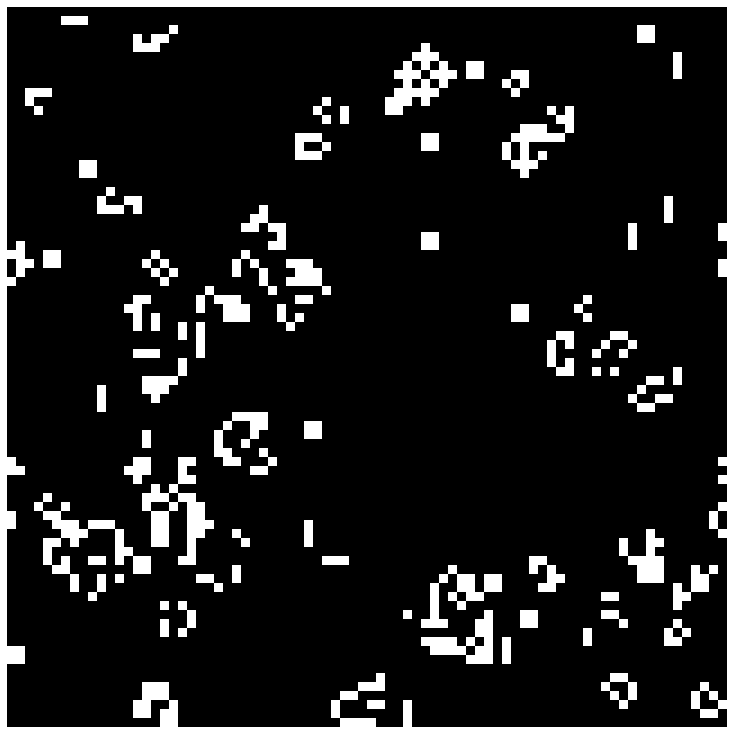

In [5]:
board = GameOfLife(length=80, height=80)
board.initialize_grid(live_threshold=.50)

fig_size_ratio = board.length / board.height

fig, ax = plt.subplots(figsize=(fig_size_ratio * 10, 10))
fig.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=None, hspace=None)
ax.axis("off")

im = ax.imshow(board.grid, cmap=Colors.ListedColormap(["black", "white"]))

def animate(i):
    board.next()
    im.set_array(board.grid)
    return [im]

anim = animation.FuncAnimation(fig, animate, frames=180, interval=0, repeat_delay=5000, blit=True)

anim.save("animation.gif", writer="pillow", fps=3, dpi=150, bitrate=-1)